## Machine Learning

### Resampling - Cross Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
bd = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
bd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
bd.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
bd.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
bd.horsepower = pd.to_numeric(bd.horsepower,errors='coerce')

In [6]:
bd.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
bd = bd.dropna()

In [8]:
bd.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [9]:
y = bd.mpg
X = bd.horsepower
y = np.array(y)
X = np.array(X)
X = X.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state=5)

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
medida = mean_squared_error(y_test, yhat)
print('MSE for Simples Linear Regression: ', medida)

MSE for Simples Linear Regression:  34.61244348009657


## Estimando o MSE da Regressão com o LOOCV

In [17]:
loo = LeaveOneOut()

mse_list = []

for train, test in loo.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    reg.fit(X_train, y_train)
    yhat = reg.predict(X_test)
    medida = mean_squared_error(y_test, yhat)
    mse_list.append(medida)

print(mse_list)
mse_array = np.array(mse_list)

[2.020010024321651, 1.2509241240422861, 3.0680516401639957, 0.06799019837204817, 0.7082556294244374, 41.35667450716614, 81.37553579730998, 67.14947672916045, 97.04988465707545, 26.34303682304336, 3.6742869739717334, 0.4707416905678176, 1.6050778867387934, 97.04988465707545, 0.889557151130716, 8.69418109789263, 44.12289653365883, 30.656222509959434, 0.9165497318131891, 45.31853784962301, 1.4570528075377136, 3.0098355440288405, 0.0035461760456729618, 15.29640877266284, 22.502220796825593, 16.79054457227355, 2.7673535145602672, 18.535464818187215, 0.22995747384892581, 0.9165497318131891, 5.183799994543558, 0.0035461760456729618, 26.674551027218364, 54.47911198315086, 51.40783236884584, 49.94052560583025, 38.03600056861017, 0.011988458474189093, 2.9103300297208614, 3.2310436344767135, 5.166911181280724, 0.23248733238398803, 0.010667890815345261, 0.48261526388763243, 21.021111412644863, 43.558519729146035, 26.674551027218364, 65.12311616023943, 11.369041835374313, 5.183799994543558, 1.25085

In [18]:
print('MSE with LOOCV:', mse_array.mean())

MSE with LOOCV: 24.231513517929226


## Fazendo com o K-Fold

In [19]:
kf = KFold(10)

mse_list = []

for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    reg.fit(X_train, y_train)
    yhat = reg.predict(X_test)
    medida = mean_squared_error(y_test, yhat)
    mse_list.append(medida)

print(mse_list)
mse_array = np.array(mse_list)

[28.34783584097226, 17.226408542020682, 26.92535793423824, 23.36016121696417, 15.5576330367143, 17.893834560501954, 17.044768671534392, 22.836578723524884, 65.93489566837351, 39.27186232855442]


In [20]:
print('MSE with KFold:', mse_array.mean())

MSE with KFold: 27.43993365233988


## Estimando o polinômio ideal

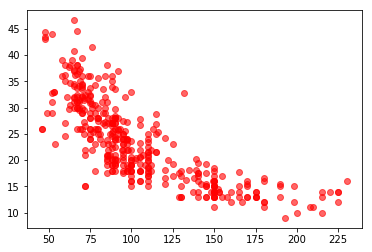

In [22]:
plt.scatter(x=bd.horsepower,y=bd.mpg, color='red', alpha=.6)
plt.show()

In [23]:
X_list = [X]

for i in range(2,11):
    poly = PolynomialFeatures(i)
    new = poly.fit_transform(X)
    X_list.append(new)
    
len(X_list)

10

In [37]:
kf_10 = KFold(10)

mse_train = []
mse_test = []

for i, (train, test) in enumerate(kf_10.split(bd)):
    X_train, X_test = X_list[i][train], X_list[i][test]
    y_train, y_test = y[train], y[test]
    reg.fit(X_train, y_train)
    yhat_poly_train = reg.predict(X_train)
    yhat_poly_test = reg.predict(X_test)
    medida_poly_train = mean_squared_error(y_train, yhat_poly_train)
    medida_poly_test = mean_squared_error(y_test, yhat_poly_test)
    mse_train.append(medida_poly_train)
    mse_test.append(medida_poly_test)
    
print(mse_train)
print('----')
print(mse_test)

[23.922424813625344, 19.345574290461606, 18.96588253038843, 18.651813996726116, 19.09878232471815, 19.11964169851455, 19.168803979483055, 18.430868484359788, 15.70185547614465, 16.85657931717671]
----
[28.34783584097226, 16.55513797223936, 19.9765955720787, 21.77511368859353, 13.004039873836788, 11.01891958419909, 11.879650992429173, 20.408022406430433, 49.811232470875275, 35.8363300394705]


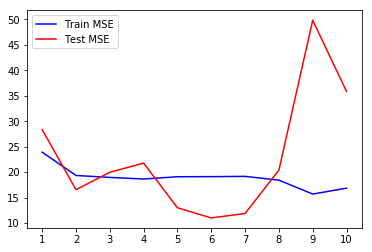

In [42]:
fig, ax = plt.subplots()
ax.plot(mse_train, color='blue', label='Train MSE')
ax.plot(mse_test, color='red', label='Test MSE')
ax.legend()
plt.xticks(range(10), range(1,11))
plt.show()

## Bootstrap

In [43]:
from sklearn.utils import resample

In [48]:
# Configurando o bootstrap
n_iterations = 1000
n_size = bd.shape[0]

# Executar o bootstrap
mse_list_bootstrap = []

for i in range(n_iterations):
    X_re, y_re = resample(X, y, replace=True, n_samples=n_size)
    X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size=.3)
    reg.fit(X_train, y_train)
    yhat_bootstrap = reg.predict(X_test)
    medida_bootstrap = mean_squared_error(y_test, yhat_bootstrap)
    mse_list_bootstrap.append(medida_bootstrap)
    
print(len(mse_list_bootstrap))

1000


In [50]:
np.mean(mse_list_bootstrap)

24.15022151927712

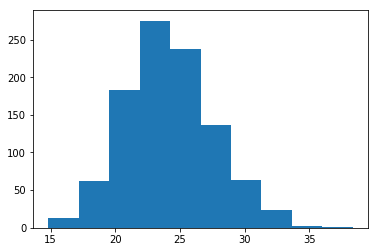

In [51]:
plt.hist(mse_list_bootstrap)
plt.show()

In [53]:
# Função para calcular o erro padrão
def stderr(x):
    n = len(x)
    return np.std(x) / np.sqrt(n)

# Função para calcular o intervalo de confiança
def confint95(x):
    err = stderr(x)
    up = np.mean(x) + 1.96*err
    low = np.mean(x) - 1.96*err
    return np.array([low, up])

print("Erro padrão da média de MSE: ", stderr(mse_list_bootstrap))
print("Intervalo de confiança do MSE: ", confint95(mse_list_bootstrap))

Erro padrão da média de MSE:  0.10701857793848023
Intervalo de confiança do MSE:  [23.94046511 24.35997793]
